# Imports

In [23]:
%load_ext autoreload
%autoreload 2

import sys  

from scipy.stats import pearsonr
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import scanpy as sc
import spatial_tools as se

# clone this repo: https://github.com/stefanpeidli/cellphonedb
sys.path.insert(0, './cellphonedb/src/api_endpoints/terminal_api/method_terminal_api_endpoints/')
from method_terminal_commands import statistical_analysis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [24]:
adata = sc.datasets.paul15()

adata.var_names = [str(g).upper() for g in adata.var_names]

/home/michal/.miniconda3/envs/cellrank/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'paul15_clusters' as categorical
/home/michal/.miniconda3/envs/cellrank/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Trying to set attribute `.uns` of view, copying.


Normalize and create `.raw`.

In [25]:
sc.pp.normalize_per_cell(adata)

adata.raw = adata.copy()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


## Save the counts

In [4]:
df_expr_matrix = adata.raw.X
df_expr_matrix = df_expr_matrix.T
df_expr_matrix = pd.DataFrame(df_expr_matrix)

df_expr_matrix.columns= adata.obs.index
df_expr_matrix.set_index(adata.raw.var.index, inplace=True) 
df_expr_matrix.to_csv('counts.txt', sep='\t')

## Save the cluster information

In [5]:
df_meta = pd.DataFrame(data={'Cell': list(adata.obs_names), 'cell_type': list(adata.obs['paul15_clusters'])})
df_meta.set_index('Cell', inplace=True)
df_meta.to_csv('meta.txt', sep='\t')

# Run the statistical analysis

## CellPhoneDB

In [6]:
statistical_analysis(meta_filename='meta.txt', counts_filename='counts.txt', threshold=0.01, threads=8,
                     debug_seed=0, iterations=1000,
                     counts_data='gene_name')

[ ][APP][13/11/20-15:54:33][WARNING] Latest local available version is `v2.0.0`, using it
[ ][APP][13/11/20-15:54:33][WARNING] User selected downloaded database `v2.0.0` is available, using it
[ ][CORE][13/11/20-15:54:33][INFO] Initializing SqlAlchemy CellPhoneDB Core
[ ][CORE][13/11/20-15:54:33][INFO] Using custom database at /home/michal/.cpdb/releases/v2.0.0/cellphone.db
[ ][APP][13/11/20-15:54:33][INFO] Launching Method cpdb_statistical_analysis_local_method_launcher
[ ][APP][13/11/20-15:54:33][INFO] Launching Method _set_paths
[ ][APP][13/11/20-15:54:33][WARNING] Output directory (/opt/projects/helmholtz/spatial-tools/notebooks/cellphonedb/out) exist and is not empty. Result can overwrite old results
[ ][APP][13/11/20-15:54:33][INFO] Launching Method _load_meta_counts
[ ][CORE][13/11/20-15:54:35][INFO] Launching Method cpdb_statistical_analysis_launcher
[ ][CORE][13/11/20-15:54:35][INFO] Launching Method _counts_validations


/opt/projects/helmholtz/spatial-tools/notebooks/cellphonedb/cellphonedb/src/core/methods/method_launcher.py:122: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  counts = counts.astype(pd.np.float)  # type: pd.DataFrame


[ ][CORE][13/11/20-15:54:35][INFO] [Cluster Statistical Analysis Simple] Threshold:0.01 Iterations:1000 Debug-seed:0 Threads:8 Precision:3
[ ][CORE][13/11/20-15:54:35][WARNING] Debug random seed enabled. Setted to 0
[ ][CORE][13/11/20-15:54:35][INFO] Running Simple Prefilters
[ ][CORE][13/11/20-15:54:35][INFO] Running Real Simple Analysis


/opt/projects/helmholtz/spatial-tools/notebooks/cellphonedb/cellphonedb/src/core/methods/cpdb_statistical_analysis_simple_method.py:28: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.random.seed(debug_seed)


[ ][CORE][13/11/20-15:54:36][INFO] Running Statistical Analysis


/opt/projects/helmholtz/spatial-tools/notebooks/cellphonedb/cellphonedb/src/core/methods/cpdb_statistical_analysis_helper.py:53: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.random.shuffle(meta_copy['cell_type'])
/opt/projects/helmholtz/spatial-tools/notebooks/cellphonedb/cellphonedb/src/core/methods/cpdb_statistical_analysis_helper.py:53: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.random.shuffle(meta_copy['cell_type'])
/opt/projects/helmholtz/spatial-tools/notebooks/cellphonedb/cellphonedb/src/core/methods/cpdb_statistical_analysis_helper.py:53: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.random.shuffle(meta_copy['cell_type'])
/opt/projects/helmholtz/spatial-tools/notebooks/cellphonedb/cellphonedb/s

[ ][CORE][13/11/20-15:59:10][INFO] Building Pvalues result
[ ][CORE][13/11/20-15:59:51][INFO] Building Simple results


/opt/projects/helmholtz/spatial-tools/notebooks/cellphonedb/cellphonedb/src/core/methods/cpdb_statistical_analysis_helper.py:44: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  significant_means.at[index, cluster_interaction] = pd.np.nan
/opt/projects/helmholtz/spatial-tools/notebooks/cellphonedb/cellphonedb/src/core/methods/cpdb_statistical_analysis_simple_method.py:171: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  deconvoluted_result['complex_name'] = pd.np.nan


[ ][CORE][13/11/20-15:59:52][INFO] [Cluster Statistical Analysis Complex] Threshold:0.01 Iterations:1000 Debug-seed:0 Threads:8 Precision:3
[ ][CORE][13/11/20-15:59:52][WARNING] Debug random seed enabled. Setted to 0
[ ][CORE][13/11/20-15:59:52][INFO] Running Complex Prefilters


/opt/projects/helmholtz/spatial-tools/notebooks/cellphonedb/cellphonedb/src/core/methods/cpdb_statistical_analysis_complex_method.py:39: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.random.seed(debug_seed)


[ ][CORE][13/11/20-16:00:00][INFO] Running Real Complex Analysis
[ ][CORE][13/11/20-16:00:00][INFO] Running Statistical Analysis


/opt/projects/helmholtz/spatial-tools/notebooks/cellphonedb/cellphonedb/src/core/methods/cpdb_statistical_analysis_helper.py:53: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.random.shuffle(meta_copy['cell_type'])
/opt/projects/helmholtz/spatial-tools/notebooks/cellphonedb/cellphonedb/src/core/methods/cpdb_statistical_analysis_helper.py:53: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.random.shuffle(meta_copy['cell_type'])
/opt/projects/helmholtz/spatial-tools/notebooks/cellphonedb/cellphonedb/src/core/methods/cpdb_statistical_analysis_helper.py:53: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.random.shuffle(meta_copy['cell_type'])
/opt/projects/helmholtz/spatial-tools/notebooks/cellphonedb/cellphonedb/s

[ ][CORE][13/11/20-16:03:22][INFO] Building Pvalues result
[ ][CORE][13/11/20-16:03:38][INFO] Building Complex results


/opt/projects/helmholtz/spatial-tools/notebooks/cellphonedb/cellphonedb/src/core/methods/cpdb_statistical_analysis_helper.py:44: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  significant_means.at[index, cluster_interaction] = pd.np.nan
/opt/projects/helmholtz/spatial-tools/notebooks/cellphonedb/cellphonedb/src/core/methods/cpdb_statistical_analysis_complex_method.py:244: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  deconvoluted_result['complex_name'] = pd.np.nan


In [5]:
pvals = pd.read_csv('out/pvalues.csv')
print(pvals.shape)
pvals.head()

(34, 372)


,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,...,9GMP|19Lymph,9GMP|1Ery,9GMP|2Ery,9GMP|3Ery,9GMP|4Ery,9GMP|5Ery,9GMP|6Ery,9GMP|7MEP,9GMP|8Mk,9GMP|9GMP
0,CPI-SS00A8596B5,PVR_TNFSF9,simple:P15151,simple:P41273,PVR,TNFSF9,True,True,False,InnateDB-All,...,0.032,1.000,1.000,1.000,0.056,1.000,1.000,1.000,0.015,1.000
1,CPI-SS085EE60B1,TGFB1_TGFBR3,simple:P01137,simple:Q03167,TGFB1,TGFBR3,True,False,True,curated,...,1.000,0.046,0.069,0.069,0.053,0.061,0.045,0.000,0.014,0.077
2,CPI-SS0ACD487F0,L1CAM_L1CAM,simple:P32004,simple:P32004,L1CAM,L1CAM,False,False,False,curated,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
3,CPI-SS0DA033F03,TNFRSF1A_GRN,simple:P19438,simple:P28799,TNFRSF1A,GRN,True,True,False,"IMEx,InnateDB-All,MINT",...,0.084,0.985,1.000,1.000,0.984,1.000,0.992,0.811,0.000,0.078
4,CPI-SS0C4E86714,TNFRSF1B_GRN,simple:P20333,simple:P28799,TNFRSF1B,GRN,True,True,False,"IMEx,InnateDB-All,MINT",...,0.061,0.961,1.000,1.000,0.984,1.000,1.000,0.819,0.000,0.054


In [6]:
pvals_clean = pvals.iloc[:, 11:]
pvals_clean.index = pd.MultiIndex.from_frame(pvals[['gene_a', 'gene_b']].astype('str'))
pvals_clean.columns = pd.MultiIndex.from_tuples(tuple(pvals_clean.columns.str.split('|')))
pvals_clean.head()

10GMP                                                     \
                 10GMP 11DC 12Baso 13Baso   14Mo 15Mo 16Neu  17Neu  18Eos   
gene_a   gene_b                                                             
PVR      TNFSF9  1.000  1.0  1.000  1.000  1.000  1.0   1.0  1.000  1.000   
TGFB1    TGFBR3  0.000  1.0  0.000  1.000  1.000  1.0   1.0  1.000  1.000   
L1CAM    L1CAM   1.000  1.0  1.000  1.000  1.000  1.0   1.0  1.000  1.000   
TNFRSF1A GRN     0.273  0.0  0.047  0.014  0.007  0.0   0.0  0.899  0.681   
TNFRSF1B GRN     0.361  0.0  0.088  0.008  0.008  0.0   0.0  0.947  0.727   

                         ...    9GMP                                     \
                19Lymph  ... 19Lymph   1Ery   2Ery   3Ery   4Ery   5Ery   
gene_a   gene_b          ...                                              
PVR      TNFSF9   1.000  ...   0.032  1.000  1.000  1.000  0.056  1.000   
TGFB1    TGFBR3   1.000  ...   1.000  0.046  0.069  0.069  0.053  0.061   
L1CAM    L1CAM    1.000  ...   1.000  1.000  1.000  1.000  1.000  1.000   
TNFRSF1A GRN      0.108  ...   0.084  0.985  1.000  1.000  0.984  1.000   
TNFRSF1B GRN      0.154  ...   0.061  0.961  1.000  1.000  0.984  1.000   

                                             
                  6Ery   7MEP    8Mk   9GMP  
gene_a   gene_b                              
PVR      TNFSF9  1.000  1.000  0.015  1.000  
TGFB1    TGFBR3  0.045  0.000  0.014  0.077  
L1CAM    L1CAM   1.000  1.000  1.000  1.000  
TNFRSF1A GRN     0.992  0.811  0.000  0.078  
TNFRSF1B GRN     1.000  0.819  0.000  0.054  

[5 rows x 361 columns]

In [7]:
means = pd.read_csv('out/means.csv')
print(means.shape)

(34, 372)


In [13]:
means_clean = means.iloc[:, 11:]
means_clean.index = pd.MultiIndex.from_frame(means[['gene_a', 'gene_b']].astype('str'))
means_clean.columns = pd.MultiIndex.from_tuples(tuple(means_clean.columns.str.split('|')))
means_clean.head()

10GMP                                                   \
                 10GMP   11DC 12Baso 13Baso   14Mo   15Mo  16Neu  17Neu   
gene_a   gene_b                                                           
PVR      TNFSF9  0.006  0.000  0.009  0.039  0.005  0.000  0.000  0.052   
TGFB1    TGFBR3  0.991  0.000  1.017  0.000  0.978  0.978  0.000  0.000   
L1CAM    L1CAM   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
TNFRSF1A GRN     0.523  1.924  0.609  0.591  0.599  0.677  0.987  0.359   
TNFRSF1B GRN     0.330  1.731  0.415  0.398  0.406  0.484  0.794  0.166   

                                ...    9GMP                              \
                 18Eos 19Lymph  ... 19Lymph   1Ery   2Ery   3Ery   4Ery   
gene_a   gene_b                 ...                                       
PVR      TNFSF9  0.000   0.046  ...   0.094  0.000  0.000  0.000  0.052   
TGFB1    TGFBR3  0.000   0.000  ...   0.000  0.891  0.895  0.911  0.917   
L1CAM    L1CAM   0.000   0.000  ...   0.000  0.000  0.000  0.000  0.000   
TNFRSF1A GRN     0.405   0.611  ...   0.627  0.330  0.311  0.300  0.332   
TNFRSF1B GRN     0.212   0.417  ...   0.470  0.173  0.155  0.144  0.175   

                                                    
                  5Ery   6Ery   7MEP    8Mk   9GMP  
gene_a   gene_b                                     
PVR      TNFSF9  0.000  0.052  0.000  0.079  0.000  
TGFB1    TGFBR3  0.906  0.929  1.049  0.993  0.903  
L1CAM    L1CAM   0.000  0.000  0.000  0.000  0.000  
TNFRSF1A GRN     0.322  0.323  0.421  0.666  0.618  
TNFRSF1B GRN     0.165  0.166  0.264  0.510  0.461  

[5 rows x 361 columns]

For some reason, the last 11 names are NaN.

In [14]:
pvals_clean.tail(12)

10GMP                                                   \
                 10GMP   11DC 12Baso 13Baso   14Mo   15Mo  16Neu  17Neu   
gene_a  gene_b                                                            
LGALS9  SORL1    0.860  0.540  0.805  0.345  0.454  0.070  0.094  0.338   
TNFSF14 LTBR     0.086  0.181  0.645  0.000  0.000  0.000  0.000  0.155   
SEMA4A  PLXND1   0.970  0.672  0.868  0.815  0.236  0.024  0.000  0.735   
CSF1    SIRPA    0.181  0.549  0.008  0.032  0.000  0.000  0.000  0.000   
        CELSR3   1.000  1.000  1.000  0.252  0.120  0.111  0.016  1.000   
CSF1R   CSF1     0.016  1.000  0.000  0.077  0.063  0.054  0.078  0.000   
CD48    CD244    0.039  0.000  0.197  0.149  1.000  0.289  0.139  1.000   
ALOX5   ALOX5AP  0.048  0.000  0.358  0.047  0.032  0.016  0.221  0.055   
SELL    CD34     0.000  0.062  0.000  0.000  0.000  0.000  0.000  0.000   
SELP    CD34     0.000  0.716  0.133  0.000  0.000  0.218  0.786  0.032   
SELL    SELPLG   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
SELP    SELPLG   0.000  0.000  0.015  0.000  0.000  0.426  0.748  0.062   

                                ...    9GMP                              \
                 18Eos 19Lymph  ... 19Lymph   1Ery   2Ery   3Ery   4Ery   
gene_a  gene_b                  ...                                       
LGALS9  SORL1    1.000   0.485  ...   0.229  1.000  1.000  1.000  1.000   
TNFSF14 LTBR     0.016   1.000  ...   1.000  0.837  0.907  0.907  0.883   
SEMA4A  PLXND1   1.000   1.000  ...   1.000  1.000  0.881  0.890  0.771   
CSF1    SIRPA    0.165   1.000  ...   1.000  1.000  1.000  1.000  1.000   
        CELSR3   1.000   1.000  ...   1.000  1.000  1.000  1.000  1.000   
CSF1R   CSF1     0.007   1.000  ...   1.000  1.000  1.000  1.000  1.000   
CD48    CD244    0.024   0.000  ...   0.000  1.000  1.000  1.000  1.000   
ALOX5   ALOX5AP  1.000   1.000  ...   1.000  0.788  0.804  0.804  1.000   
SELL    CD34     1.000   0.070  ...   0.609  0.805  0.938  0.906  0.844   
SELP    CD34     1.000   0.731  ...   0.398  0.439  0.485  0.485  0.485   
SELL    SELPLG   0.250   0.000  ...   0.000  0.984  1.000  1.000  0.976   
SELP    SELPLG   0.485   0.000  ...   0.000  0.485  0.485  0.485  0.477   

                                                    
                  5Ery   6Ery   7MEP    8Mk   9GMP  
gene_a  gene_b                                      
LGALS9  SORL1    0.437  0.437  1.000  0.398  0.389  
TNFSF14 LTBR     0.862  0.072  0.519  0.754  0.197  
SEMA4A  PLXND1   1.000  0.793  1.000  0.756  0.131  
CSF1    SIRPA    1.000  1.000  1.000  1.000  1.000  
        CELSR3   1.000  1.000  1.000  1.000  1.000  
CSF1R   CSF1     1.000  1.000  1.000  1.000  1.000  
CD48    CD244    1.000  1.000  1.000  1.000  0.061  
ALOX5   ALOX5AP  0.804  0.804  0.320  0.267  0.268  
SELL    CD34     0.929  0.831  0.676  0.378  0.000  
SELP    CD34     0.485  0.485  0.439  0.315  0.000  
SELL    SELPLG   0.984  0.851  0.675  0.970  0.000  
SELP    SELPLG   0.485  0.461  0.416  0.485  0.000  

[12 rows x 361 columns]

In [15]:
pvals_clean = pvals_clean.iloc[:23]

In [16]:
means_clean = means_clean.iloc[:23]

In [20]:
means_clean.index.to_series()

gene_a    gene_b 
PVR       TNFSF9        (PVR, TNFSF9)
TGFB1     TGFBR3      (TGFB1, TGFBR3)
L1CAM     L1CAM        (L1CAM, L1CAM)
TNFRSF1A  GRN         (TNFRSF1A, GRN)
TNFRSF1B  GRN         (TNFRSF1B, GRN)
CD74      APP             (CD74, APP)
NRP2      VEGFA         (NRP2, VEGFA)
CSF1      SLC7A1       (CSF1, SLC7A1)
GRN       SORT1          (GRN, SORT1)
CXCL10    DPP4         (CXCL10, DPP4)
LGALS9    LRP1         (LGALS9, LRP1)
          SORL1       (LGALS9, SORL1)
TNFSF14   LTBR        (TNFSF14, LTBR)
SEMA4A    PLXND1     (SEMA4A, PLXND1)
CSF1      SIRPA         (CSF1, SIRPA)
          CELSR3       (CSF1, CELSR3)
CSF1R     CSF1          (CSF1R, CSF1)
CD48      CD244         (CD48, CD244)
ALOX5     ALOX5AP    (ALOX5, ALOX5AP)
SELL      CD34           (SELL, CD34)
SELP      CD34           (SELP, CD34)
SELL      SELPLG       (SELL, SELPLG)
SELP      SELPLG       (SELP, SELPLG)
dtype: object

## Run spatial_tools' permutation test

In [26]:
res = se.graph.perm_test(adata, "paul15_clusters", interactions=list(pvals_clean.index),
                        fdr_method=None, copy=True,
                        threshold=0.01, seed=0, n_perms=10000, n_jobs=1)
print(res.means.sparse.density)  # should be a sparse dataframe

df = res.pvalues
print(df.shape)

df.head()


0.5899072624352644
(23, 361)


cluster_1         10GMP                                                     \
cluster_2         10GMP 11DC  12Baso  13Baso    14Mo    15Mo 16Neu   17Neu   
source   target                                                              
PVR      TNFSF9     NaN  NaN     NaN     NaN     NaN     NaN   NaN     NaN   
TGFB1    TGFBR3  0.0011  NaN  0.0004     NaN     NaN     NaN   NaN     NaN   
L1CAM    L1CAM      NaN  NaN     NaN     NaN     NaN     NaN   NaN     NaN   
TNFRSF1A GRN     0.2868  NaN  0.0599  0.0186  0.0094  0.0003   NaN  0.8761   
TNFRSF1B GRN     0.3620  NaN  0.0702  0.0107  0.0024  0.0003   NaN  0.9240   

cluster_1                        ...    9GMP                                  \
cluster_2         18Eos 19Lymph  ... 19Lymph    1Ery    2Ery    3Ery    4Ery   
source   target                  ...                                           
PVR      TNFSF9     NaN     NaN  ...  0.0202     NaN     NaN     NaN  0.0540   
TGFB1    TGFBR3     NaN     NaN  ...     NaN  0.0977  0.0819  0.0648  0.0584   
L1CAM    L1CAM      NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
TNFRSF1A GRN     0.6276  0.1265  ...  0.1233  0.9600  0.9994  0.9996  0.9898   
TNFRSF1B GRN     0.6756  0.1525  ...  0.0763  0.9706  1.0000  1.0000  0.9984   

cluster_1                                                
cluster_2          5Ery    6Ery    7MEP     8Mk    9GMP  
source   target                                          
PVR      TNFSF9     NaN     NaN     NaN  0.0131     NaN  
TGFB1    TGFBR3  0.0682  0.0467  0.0044  0.0165  0.0756  
L1CAM    L1CAM      NaN     NaN     NaN     NaN     NaN  
TNFRSF1A GRN     0.9964  0.9964  0.8348  0.0292  0.0908  
TNFRSF1B GRN     0.9998  0.9998  0.8530  0.0067  0.0313  

[5 rows x 361 columns]

# Compare the results

In [27]:
pearsonr(pvals_clean.values.flat, np.nan_to_num(df.values, nan=1).flat)

(0.7358355184559436, 0.0)

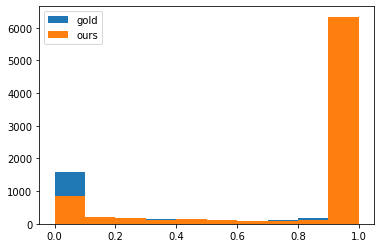

In [28]:
plt.hist(pvals_clean.values.flat, label='gold')
plt.hist(np.nan_to_num(df.values, nan=1).flat, label='ours')
_ = plt.legend()

Text(0, 0.5, 'gold')

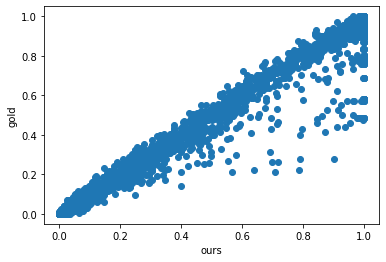

In [29]:
plt.scatter(df.values.flat, pvals_clean.values.flat)
plt.xlabel("ours")
plt.ylabel("gold")

## Maximum absolute difference

In [30]:
np.nanmax(np.abs(df.values - pvals_clean.values))

0.6271

# % of significant

In [31]:
sig_df = df.values <= 0.05
sig_gold = pvals_clean.values <= 0.05

sig_df.sum() / len(df.values.flat), sig_gold.sum() / len(pvals_clean.values.flat)

(0.07888714922317235, 0.1657232325665422)

In [32]:
mismatch = sig_df != sig_gold
m_df = df.values[mismatch]
m_gold = pvals_clean.values[mismatch]

## Mismatching significant

Text(0, 0.5, 'gold')

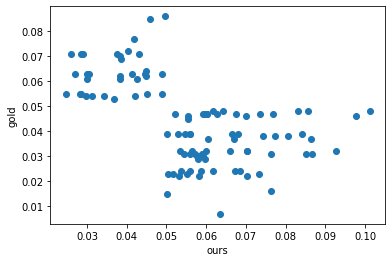

In [33]:
plt.scatter(m_df, m_gold)
plt.xlabel("ours")
plt.ylabel("gold")

In [34]:
np.nanmax(np.abs(m_df - m_gold))

0.0606

## Means comparison

Text(0, 0.5, 'gold')

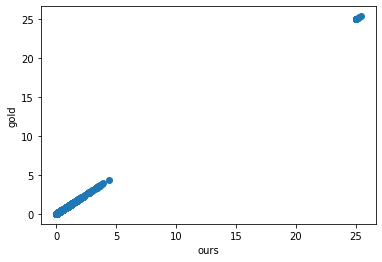

In [35]:
plt.scatter(res.means.values.flat, means_clean.values.flat)
plt.xlabel("ours")
plt.ylabel("gold")

In [36]:
res.means.to_pickle("means_clean.pickle")